In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS
import os

pictures = os.scandir("pokemon")
#for pic in pictures:
#print(pic.path)
# open the image
image = Image.open("pokemon/zygarde.jpg")

# extracting the exif metadata
exifdata = image.getexif()
print(exifdata)
# looping through all the tags present in exifdata
for tagid in exifdata:
    
    tag = TAGS.get(tagid, tagid)
    data = exifdata.get(tagid)
    # decode bytes 
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

[[59.89498611111111, 10.743488888888889], [59.865494444444444, 10.776366666666668], [59.85709722222222, 10.751041666666667], [59.87734444444445, 10.766861111111112], [59.856575, 10.763997222222223], [59.87591111111111, 10.765755555555556], [59.87649722222222, 10.758788888888889], [59.89368611111111, 10.779361111111111], [59.91145833333333, 10.757161111111111], [59.85598888888889, 10.735872222222222], [59.85911388888889, 10.77688888888889], [59.88073055555556, 10.747525], [59.87701944444444, 10.7653], [59.872525, 10.773894444444446], [59.891275, 10.743749999999999], [59.87994722222222, 10.766144444444445], [59.89986944444444, 10.782683333333335], [59.86341111111111, 10.749022222222221], [59.87278611111111, 10.744855555555555], [59.89876388888889, 10.782747222222223], [59.870377777777776, 10.759180555555556], [59.88704444444444, 10.778516666666668], [59.91139444444444, 10.759569444444445], [59.868227777777776, 10.754427777777778], [59.87428333333333, 10.778905555555557], [59.866666666666

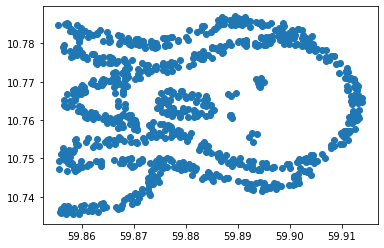

In [1]:
import subprocess
import re
import matplotlib.pyplot as plt
import numpy as np

infoDict = {}


pictures = os.scandir("pokemon")
coords = []
for pic in pictures:
    process = subprocess.Popen(["/usr/bin/exiftool", f"/home/tostby/random/knowit_2022/des12/{pic.path}"],stdout=subprocess.PIPE, stderr=subprocess.STDOUT,universal_newlines=True) 
    for tag in process.stdout:
        line = tag.strip().split(':')
        infoDict[line[0].strip()] = line[-1].strip()
    list_coords = []
    for k,v in infoDict.items():
        if k == "GPS Latitude":
            x = re.findall(r'[0-9.]+', v)
            DD = int(x[0]) + (int(x[1])/60) + (float(x[2])/3600)
            list_coords.append(DD)
        if k == "GPS Longitude":
            x = re.findall(r'[0-9.]+', v)
            DD = int(x[0]) + (int(x[1])/60) + (float(x[2])/3600)
            list_coords.append(DD)
    coords.append(list_coords)

data = np.array(coords)
x, y = data.T
plt.scatter(x,y)
plt.show()

In [2]:
import re
x = re.findall(r'[0-9.]+', "59 deg 53' 41.95' N")
print(x)

['59', '53', '41.95']
